<a href="https://colab.research.google.com/github/Adeverdauss/Data-Science/blob/main/Klasifikasi_Mangga_fr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


In [ ]:
!kaggle datasets download -d 'masoudnickparvar/white-blood-cells-dataset'

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/white-blood-cells-dataset
License(s): copyright-authors
100% 499M/499M [00:05<00:00, 114MB/s]
100% 499M/499M [00:05<00:00, 94.5MB/s]


In [2]:
import zipfile
dataset = zipfile.ZipFile('Mangga.zip', 'r')
dataset.extractall()
dataset.close()

In [3]:
import os
os.listdir('Mangga')

['Mangga Alpukat', 'Mangga Harum Manis', 'Mangga Gedong Gincu']

In [4]:
# Direct
dataset_dir = 'Mangga'

In [5]:
data = []
labels = []

In [6]:

# Preprocessing: Membaca gambar dan menyimpan data serta labelnya
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            # Membaca gambar
            img = cv2.imread(image_path)
            img = cv2.resize(img, (299, 299))  # Resize sesuai InceptionV3
            data.append(img)
            labels.append(class_dir)

In [7]:
# Konversi ke numpy array
data = np.array(data)
labels = np.array(labels)


In [8]:
# One-hot encode label
label_encoder = {label: i for i, label in enumerate(np.unique(labels))}
labels = np.array([label_encoder[label] for label in labels])

In [9]:
# Split data menjadi train dan test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)



In [10]:

# Augmentasi menggunakan ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [11]:

# Siapkan generator data training
train_datagen = datagen.flow(X_train, y_train, batch_size=32)

# Siapkan model InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Bangun model klasifikasi
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')  # Kelas sesuai jumlah label unik
])

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
# Siapkan model InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Bangun model klasifikasi
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')  # Kelas sesuai jumlah label unik
])

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Latih model
history = model.fit(
    train_datagen,
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_test / 255.0, y_test)  # Normalisasi data test
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 76s 39s/step - accuracy: 0.9889 - loss: 0.0320 - val_accuracy: 0.8667 - val_loss: 0.3802
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 80s 39s/step - accuracy: 0.9569 - loss: 0.1010 - val_accuracy: 0.4000 - val_loss: 1.4564
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 76s 33s/step - accuracy: 0.9021 - loss: 0.2644 - val_accuracy: 0.3333 - val_loss: 1.8248
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 79s 35s/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.3333 - val_loss: 4.2844
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 84s 37s/step - accuracy: 0.9310 - loss: 0.1990 - val_accuracy: 0.3333 - val_loss: 7.3154
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 66s 36s/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 0.3333 - val_loss: 12.5007
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 80s 31s/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 0.3333 - val_loss: 23.5205
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 67s 32s/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.3333 - val_loss: 27.58

KeyboardInterrupt: 

In [ ]:

# Evaluasi model
test_loss, test_accuracy = model.evaluate(X_test / 255.0, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 843.6144
Test Accuracy: 33.33%


Berikut adalah testing kedua

In [16]:
!pip install rembg # Install the rembg package
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from rembg import remove
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.8 MB/s eta 0:00:00


In [17]:

# Fungsi untuk menghilangkan background dan mengubah latar belakang transparan menjadi hitam
def remove_background(image_path):
    with open(image_path, 'rb') as img_file:
        img_data = img_file.read()
    output = remove(img_data)
    img = cv2.imdecode(np.frombuffer(output, np.uint8), -1)

    # Jika citra memiliki 4 channel (RGBA), ubah latar belakang (background) yang transparan menjadi hitam
    if img.shape[2] == 4:  # Jika citra memiliki 4 saluran (RGBA)
        alpha_channel = img[:, :, 3]
        rgb_channels = img[:, :, :3]

        # Buat mask dari alpha (jika pixel alpha 0, berarti itu background yang transparan)
        mask = alpha_channel == 0

        # Set pixel mask yang transparan menjadi hitam
        rgb_channels[mask] = [0, 0, 0]

        # Ubah kembali ke citra RGB tanpa alpha
        img = rgb_channels

    return img

In [ ]:

# Fungsi untuk menghilangkan background dan mengubah latar belakang transparan menjadi hitam
def remove_background(image_path):
    with open(image_path, 'rb') as img_file:
        img_data = img_file.read()
    output = remove(img_data)
    img = cv2.imdecode(np.frombuffer(output, np.uint8), -1)

    # Jika citra memiliki 4 channel (RGBA), ubah latar belakang (background) yang transparan menjadi hitam
    if img.shape[2] == 4:  # Jika citra memiliki 4 saluran (RGBA)
        alpha_channel = img[:, :, 3]
        rgb_channels = img[:, :, :3]

        # Buat mask dari alpha (jika pixel alpha 0, berarti itu background yang transparan)
        mask = alpha_channel == 0

        # Set pixel mask yang transparan menjadi hitam
        rgb_channels[mask] = [0, 0, 0]

        # Ubah kembali ke citra RGB tanpa alpha
        img = rgb_channels

    return img

In [18]:
# Path ke dataset
dataset_dir = 'Mangga'  # Sesuaikan dengan path dataset Anda


In [19]:

# Inisialisasi variabel data dan label
data = []
labels = []

In [20]:
# Preprocessing: Membaca gambar, menghilangkan background, dan menyimpan data serta labelnya
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            # Menghilangkan background
            img = remove_background(image_path)
            img = cv2.resize(img, (299, 299))  # Resize sesuai InceptionV3
            data.append(img)
            labels.append(class_dir)


100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 29.6GB/s]


In [21]:
# Konversi ke numpy array
data = np.array(data)
labels = np.array(labels)


In [22]:
# One-hot encode label
label_encoder = {label: i for i, label in enumerate(np.unique(labels))}
labels = np.array([label_encoder[label] for label in labels])


In [23]:
# Split data menjadi train dan test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)


In [24]:
# Augmentasi menggunakan ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [25]:
# Siapkan generator data training
train_datagen = datagen.flow(X_train, y_train, batch_size=32)

# Siapkan model InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Bangun model klasifikasi
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')  # Kelas sesuai jumlah label unik
])

In [26]:
# Tentukan learning rate
learning_rate = 0.0001  # Anda bisa menyesuaikan nilainya

# Kompilasi model dengan learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(
    train_datagen,
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test / 255.0, y_test)  # Normalisasi data test
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 95s 95s/step - accuracy: 0.2500 - loss: 1.3280 - val_accuracy: 0.4000 - val_loss: 1.1655
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step - accuracy: 0.5357 - loss: 0.8499 - val_accuracy: 0.4667 - val_loss: 0.9138
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4667 - val_loss: 0.9138
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 47s 47s/step - accuracy: 0.6875 - loss: 0.6591 - val_accuracy: 0.8667 - val_loss: 0.7442
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 34s 34s/step - accuracy: 1.0000 - loss: 0.2676 - val_accuracy: 0.8667 - val_loss: 0.6389
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 0.6389
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step - accuracy: 1.0000 - loss: 0.1773 - val_accuracy: 0.8667 - val_loss: 0.5628
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 34s 34s/step - accuracy: 1.0000 - loss: 0.1096 - val_accuracy: 0.8000 - val_loss: 0.5013
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8000 - val_loss: 0.5013
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 92s 92s/step - accuracy: 1.0000 - loss: 0.0682 - val_accuracy: 0.8000 - val_loss:

In [27]:
# Evaluasi model
test_loss, test_accuracy = model.evaluate(X_test / 255.0, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8000 - loss: 0.4559
Test Accuracy: 80.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


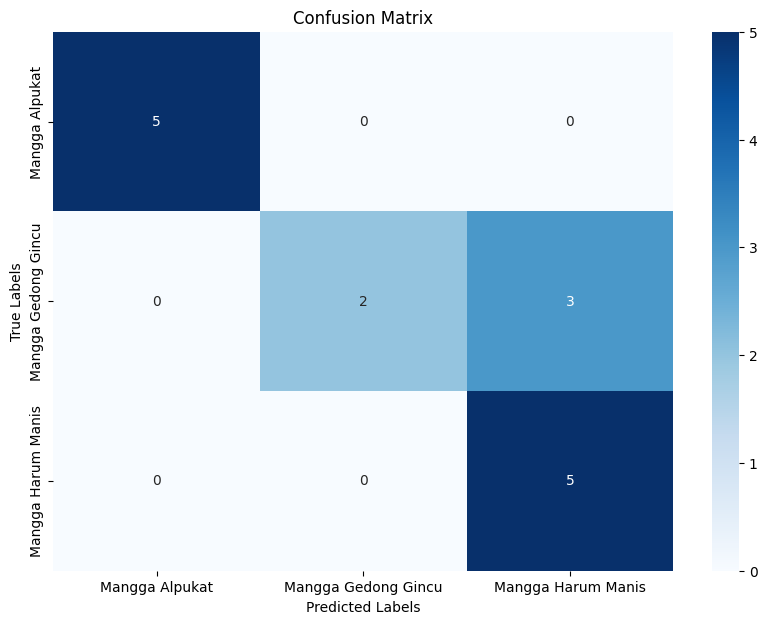

Classification Report:

                     precision    recall  f1-score   support

     Mangga Alpukat       1.00      1.00      1.00         5
Mangga Gedong Gincu       1.00      0.40      0.57         5
 Mangga Harum Manis       0.62      1.00      0.77         5

           accuracy                           0.80        15
          macro avg       0.88      0.80      0.78        15
       weighted avg       0.88      0.80      0.78        15



In [28]:

# Prediksi menggunakan model
y_pred = model.predict(X_test / 255.0)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualisasikan Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.keys(), yticklabels=label_encoder.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.keys()))

Ketiga

In [39]:
!pip install rembg # Install the rembg package
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import train_test_split
from rembg import remove
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:

# Fungsi untuk menghilangkan background dan mengubah latar belakang transparan menjadi hitam
def remove_background(image_path):
    with open(image_path, 'rb') as img_file:
        img_data = img_file.read()
    output = remove(img_data)
    img = cv2.imdecode(np.frombuffer(output, np.uint8), -1)

    # Jika citra memiliki 4 channel (RGBA), ubah latar belakang (background) yang transparan menjadi hitam
    if img.shape[2] == 4:  # Jika citra memiliki 4 saluran (RGBA)
        alpha_channel = img[:, :, 3]
        rgb_channels = img[:, :, :3]

        # Buat mask dari alpha (jika pixel alpha 0, berarti itu background yang transparan)
        mask = alpha_channel == 0

        # Set pixel mask yang transparan menjadi hitam
        rgb_channels[mask] = [0, 0, 0]

        # Ubah kembali ke citra RGB tanpa alpha
        img = rgb_channels

    return img

In [41]:
# Path ke dataset
dataset_dir = 'Mangga'  # Sesuaikan dengan path dataset Anda


In [42]:
# Inisialisasi variabel data dan label
data = []
labels = []


In [43]:
# Preprocessing: Membaca gambar, menghilangkan background, dan menyimpan data serta labelnya
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            # Menghilangkan background
            img = remove_background(image_path)
            img = cv2.resize(img, (299, 299))  # Resize sesuai InceptionV3
            data.append(img)
            labels.append(class_dir)

In [44]:
# Konversi ke numpy array
data = np.array(data)
labels = np.array(labels)


In [45]:
# One-hot encode label
label_encoder = {label: i for i, label in enumerate(np.unique(labels))}
labels = np.array([label_encoder[label] for label in labels])

In [46]:
# Split data menjadi train dan test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)


In [47]:
# Augmentasi menggunakan ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)


In [48]:

# Siapkan generator data training
train_datagen = datagen.flow(X_train, y_train, batch_size=32)

# Siapkan model InceptionV3 dengan fine-tuning
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = True  # Unfreeze semua lapisan

# Bangun model klasifikasi
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')  # Kelas sesuai jumlah label unik
])

In [49]:
# Learning rate scheduler
def lr_scheduler(epoch):
    return 1e-3 * 10 ** (epoch / 10)

lr_schedule = LearningRateScheduler(lr_scheduler)

# Callbacks: Early stopping dan Model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy') # Changed .h5 to .keras

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# Latih model
history = model.fit(
    train_datagen,
    steps_per_epoch=len(X_train) // 64,
    epochs=10,
    validation_data=(X_test / 255.0, y_test),  # Normalisasi data test
    callbacks=[early_stopping, checkpoint, lr_schedule]
)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 72s 37s/step - accuracy: 0.9451 - loss: 0.1245 - val_accuracy: 0.3333 - val_loss: 5.8578 - learning_rate: 0.0010
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 66s 35s/step - accuracy: 0.9556 - loss: 0.2396 - val_accuracy: 0.3333 - val_loss: 13.2747 - learning_rate: 0.0013
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 68s 39s/step - accuracy: 1.0000 - loss: 0.0246 - val_accuracy: 0.3333 - val_loss: 50.3625 - learning_rate: 0.0016
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 68s 38s/step - accuracy: 1.0000 - loss: 0.0251 - val_accuracy: 0.3333 - val_loss: 116.0837 - learning_rate: 0.0020
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 81s 34s/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.3333 - val_loss: 1106.8628 - learning_rate: 0.0025


In [52]:
# Evaluasi model
test_loss, test_accuracy = model.evaluate(X_test / 255.0, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3333 - loss: 5.8578
Test Accuracy: 33.33%


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


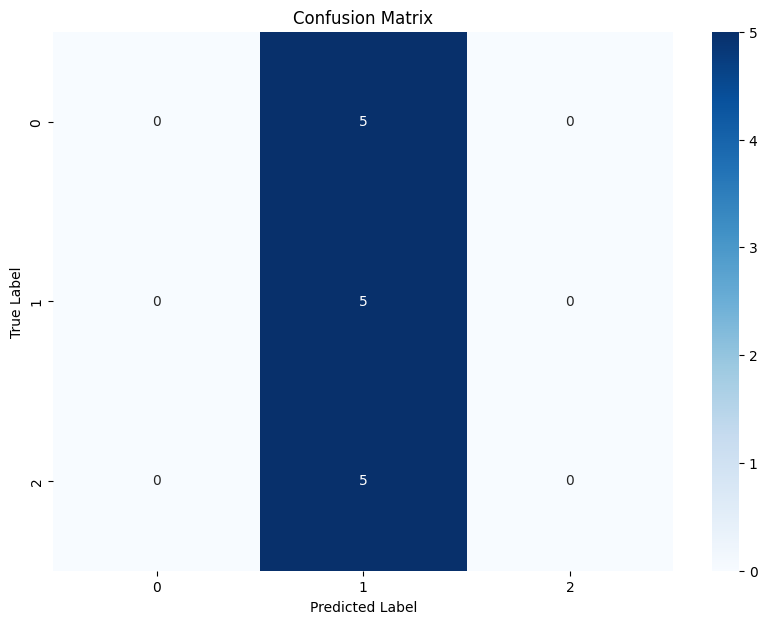

In [53]:
# Confusion matrix
y_pred = model.predict(X_test / 255.0)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

ke empat

In [54]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from rembg import remove
from tensorflow.keras.regularizers import l2

In [55]:
# Fungsi untuk menghilangkan background dan menggantinya dengan hitam
def remove_background(image_path):
    with open(image_path, 'rb') as img_file:
        img_data = img_file.read()
    output = remove(img_data)
    img = cv2.imdecode(np.frombuffer(output, np.uint8), -1)
    # Pastikan citra hanya memiliki 3 saluran (RGB) dan mengganti background dengan hitam
    if img.shape[2] == 4:  # Jika citra memiliki 4 saluran (RGBA)
        alpha_channel = img[:, :, 3]  # Mendapatkan channel alpha
        rgb_channels = img[:, :, :3]
        # Ganti background transparan dengan hitam
        black_background = np.zeros_like(rgb_channels, dtype=np.uint8)
        mask = alpha_channel > 0  # Bagian non-transparan
        img = np.where(mask[:, :, None], rgb_channels, black_background)
    return img


In [56]:
# Path ke dataset
dataset_dir = 'Mangga'  # Sesuaikan dengan path dataset Anda


In [57]:
# Inisialisasi variabel data dan label
data = []
labels = []


In [58]:
# Preprocessing: Membaca gambar, menghilangkan background, dan menyimpan data serta labelnya
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            # Menghilangkan background dan membuat latar belakang hitam
            img = remove_background(image_path)
            img = cv2.resize(img, (299, 299))  # Resize sesuai InceptionV3
            data.append(img)
            labels.append(class_dir)

In [59]:
# Konversi ke numpy array
data = np.array(data)
labels = np.array(labels)

In [60]:
# One-hot encode label
label_encoder = {label: i for i, label in enumerate(np.unique(labels))}
labels = np.array([label_encoder[label] for label in labels])


In [61]:
# Split data menjadi train dan test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)


In [62]:
# Augmentasi menggunakan ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [63]:
# Siapkan generator data training
train_datagen = datagen.flow(X_train, y_train, batch_size=32)

# Siapkan model InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Fine-tuning hanya pada 20 lapisan terakhir
base_model.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True

In [68]:
# Bangun model klasifikasi dengan regularisasi L2 dan dropout untuk mengurangi overfitting
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout untuk mencegah overfitting
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Regularisasi L2
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')  # Jumlah kelas sesuai dengan dataset
])

# Kompilasi model menggunakan Adam optimizer dengan learning rate rendah
model.compile(optimizer=Adam(learning_rate=1e-5),  # Learning rate rendah
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks: Early stopping dan Model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy') # Changed .h5 to .keras

In [71]:
# Latih model dengan early stopping dan checkpoint
history = model.fit(
    train_datagen,
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    validation_data=(X_test / 255.0, y_test),  # Normalisasi data test
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.2500 - loss: 1.6364 - val_accuracy: 0.2667 - val_loss: 1.4216
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.2500 - loss: 1.6793 - val_accuracy: 0.2667 - val_loss: 1.4069
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2667 - val_loss: 1.4069
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.3750 - loss: 1.4727 - val_accuracy: 0.2667 - val_loss: 1.3918
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.2857 - loss: 1.4911 - val_accuracy: 0.3333 - val_loss: 1.3771
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.3771
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.2857 - loss: 1.4585 - val_accuracy: 0.4000 - val_loss: 1.3623
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.3438 - loss: 1.3416 - val_accuracy: 0.4000 - val_l

In [72]:
# Evaluasi model
test_loss, test_accuracy = model.evaluate(X_test / 255.0, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9333 - loss: 0.9829
Test Accuracy: 93.33%


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


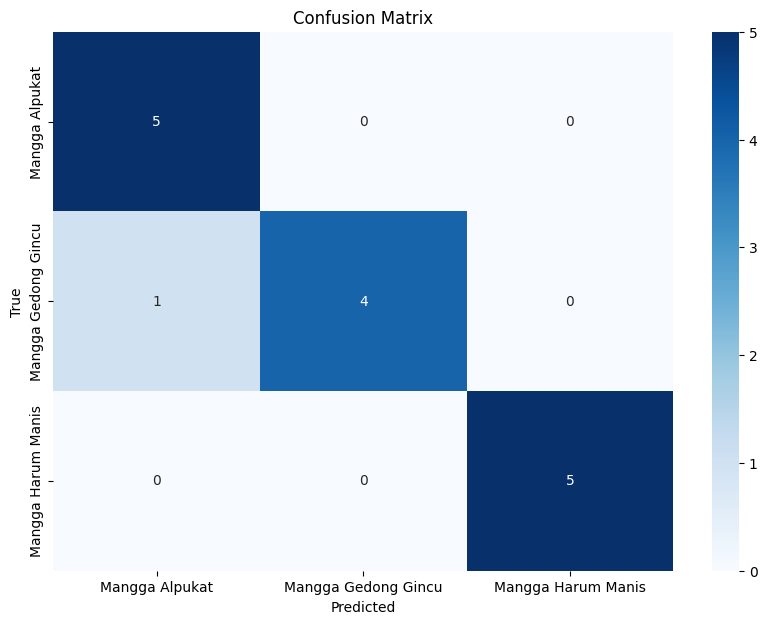

In [73]:
# Confusion Matrix dan Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi data uji
y_pred = model.predict(X_test / 255.0)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.keys(), yticklabels=label_encoder.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [74]:
# Classification Report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.keys())
print(report)

                     precision    recall  f1-score   support

     Mangga Alpukat       0.83      1.00      0.91         5
Mangga Gedong Gincu       1.00      0.80      0.89         5
 Mangga Harum Manis       1.00      1.00      1.00         5

           accuracy                           0.93        15
          macro avg       0.94      0.93      0.93        15
       weighted avg       0.94      0.93      0.93        15



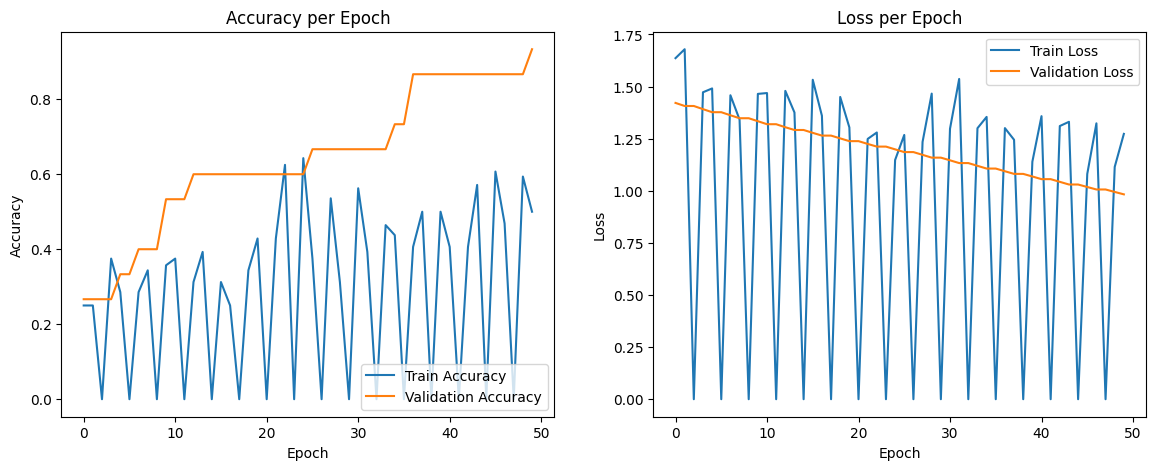

In [75]:
# Plot grafik Akurasi dan Loss
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(14,5))

    # Plot Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

# Panggil fungsi untuk menampilkan grafik
plot_history(history)